In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
temp = pd.read_excel('diabetes509.xlsx')

In [3]:
temp

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
0,1000,203.0,82,56.0,3.6,4.310000,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.440000,Buckingham,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.640000,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,49.0,57.0,180.0
3,1003,78.0,93,12.0,6.5,4.630000,Buckingham,67,male,67.0,119.0,large,110.0,50.0,NaN,NaN,33.0,38.0,480.0
4,1005,249.0,90,28.0,8.9,7.720000,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,NaN,NaN,44.0,41.0,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,41506,296.0,369,46.0,6.4,16.110001,Louisa,53,male,69.0,173.0,medium,138.0,94.0,130.0,94.0,35.0,39.0,210.0
399,41507,284.0,89,54.0,5.3,4.390000,Louisa,51,female,63.0,154.0,medium,140.0,100.0,146.0,102.0,32.0,43.0,180.0
400,41510,194.0,269,38.0,5.1,13.630000,Louisa,29,female,69.0,167.0,small,120.0,70.0,NaN,NaN,33.0,40.0,20.0
401,41752,199.0,76,52.0,3.8,4.490000,Louisa,41,female,63.0,197.0,medium,120.0,78.0,NaN,NaN,41.0,48.0,255.0


In [4]:
print(temp.isnull().sum())

id            0
chol          1
stab.glu      0
hdl           1
ratio         1
glyhb        13
location      0
age           0
gender        0
height        5
weight        1
frame        12
bp.1s         5
bp.1d         5
bp.2s       262
bp.2d       262
waist         2
hip           2
time.ppn      3
dtype: int64


In [5]:
df = temp.drop(['bp.2s', 'bp.2d','ratio','frame','location','waist','hip','time.ppn'], axis=1)

In [6]:
df = df.dropna()

In [7]:
gender_counts = pd.crosstab(index=df.gender, columns='count')
gender_counts

col_0,count
gender,
female,221
male,158


**chol** = cholestrol (**Normal**: Less than 200 mg/dL.
**Borderline high**: 200 to 239 mg/dL.
**High**: At or above 240 mg/dL.)

**stab.glu** = stabilized glucose

**hdl** = high density lipoprotein

**glyhb**	= glycosylated hemoglobin(***normal range*** 4% and 5.6%, ***prediabetes***  5.7% and 6.4% , 6.5% or higher ***diabetes*** )

**bp.1s** = blood pressure(s = systolic) 1st day

**bp.1d** = blood pressure(d = diastolic) 1st day

**bp.2s** = blood pressure(s = systolic) 2nd day

**bp.2d** = blood pressure(d = diastolic) 2nd day

**Time.ppn** = time. Peripheral parental nutrition

**glyhb**	is more accurate accurate to detect diabetes

#HDL#
**MEN** = ***DESIRABLE***(60 mg/dL (1.6 mmol/L) or above)  ***AT RISK*** (Less than 40 mg/dL (1.0 mmol/L))


**WOMEN** = ***DESIRABLE***(60 mg/dL (1.6 mmol/L) or above) ***AT RISK***(Less than 50 mg/dL (1.3 mmol/L))

**Systolic blood pressure** refers to the amount of pressure experienced by the arteries while the heart is beating. **Diastolic blood pressure**  refers to the amount of pressure in the arteries while the heart is resting in between heartbeats

#Cholestrol(chol)

**Normal**: Less than 200 mg/dL.
**Borderline high**: 200 to 239 mg/dL.
**High**: At or above 240 mg/dL.)

In [8]:
def chol_status(value):
    if  value < 200:
        return "Normal"
    elif value >= 200 and value <= 239:
        return "Boderline High"
    elif value > 239:
        return "High"

df['chol_status'] = df['chol'].map(chol_status)

#Body Mass Index#

**BODY MASS INDEX** = 703 * weight/height

**Underweight**: BMI is less than 18.5

**Normal weight**: BMI is 18.5 to 24.9

**Overweight**: BMI is 25 to 29.9

**Obese**: BMI is 30 or more


In [9]:
df['BMI'] = 703 * df['weight']/df['height']**2

In [10]:
def bmi_status(value):
    if  value < 18.5 :
        return "Underweight"
    elif value >= 18.5 and value <= 24.9:
        return "Normal"
    elif value > 24.9 and value <=29.9:
        return "Overweight"
    elif value > 29.9:
        return "Obese"
df['bmi_status'] = df['BMI'].map(bmi_status)

#Glycosylated Hemoglobin(glyhb)

***normal range*** 4% and 5.6%, ***prediabetes***  5.7% and 6.4% ,***diabetes***  6.5% or higher

In [11]:
def status(value):
    if value >= 4 and value <= 5.6 :
        return "Normal"
    elif value > 5.6 and value <= 6.4:
        return "Prediabetes"
    elif value > 6.4:
        return "Diabetes"
df['status'] = df['glyhb'].map(status)

In [12]:
df

,id,chol,stab.glu,hdl,glyhb,age,gender,height,weight,bp.1s,bp.1d,chol_status,BMI,bmi_status,status
0,1000,203.0,82,56.0,4.310000,46,female,62.0,121.0,118.0,59.0,Boderline High,22.128772,Normal,Normal
1,1001,165.0,97,24.0,4.440000,29,female,64.0,218.0,112.0,68.0,Normal,37.415527,Obese,Normal
2,1002,228.0,92,37.0,4.640000,58,female,61.0,256.0,190.0,92.0,Boderline High,48.365493,Obese,Normal
3,1003,78.0,93,12.0,4.630000,67,male,67.0,119.0,110.0,50.0,Normal,18.635999,Normal,Normal
4,1005,249.0,90,28.0,7.720000,64,male,68.0,183.0,138.0,80.0,High,27.822016,Overweight,Diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,41503,301.0,90,118.0,4.280000,89,female,61.0,115.0,218.0,90.0,High,21.726686,Normal,Normal
398,41506,296.0,369,46.0,16.110001,53,male,69.0,173.0,138.0,94.0,High,25.544844,Overweight,Diabetes
399,41507,284.0,89,54.0,4.390000,51,female,63.0,154.0,140.0,100.0,High,27.276896,Overweight,Normal
400,41510,194.0,269,38.0,13.630000,29,female,69.0,167.0,120.0,70.0,Normal,24.658895,Normal,Diabetes


#BARPLOT
**Gender vs Haemoglobin** by grouping according to **cholestrol status**

Text(0, 0.5, 'Glycosylated Hemoglobin')

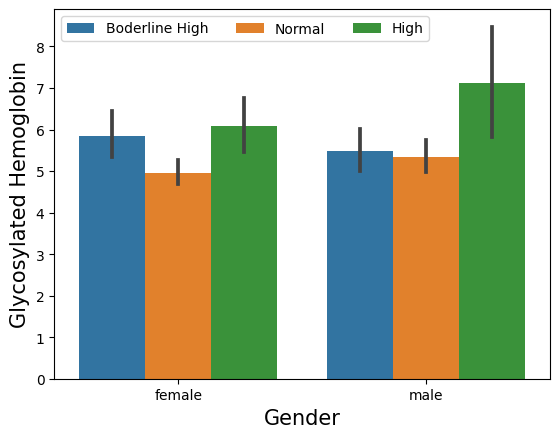

In [13]:
ax1 = sns.barplot(x="gender",y="glyhb",hue="chol_status",data=df)
ax1.legend(loc='upper left', ncol=4)
ax1.set_xlabel("Gender",fontsize=15)
ax1.set_ylabel("Glycosylated Hemoglobin",fontsize=15)


##**Observation**##
Here it is seen that in both the genders if the **glycosylated hemoglobin** is high , then the **cholestrol level** is also high

#BARPLOT
**Gender vs Serum_cholesterol** by grouping according to **BMI**

Text(0, 0.5, 'Glycosylated Hemoglobin')

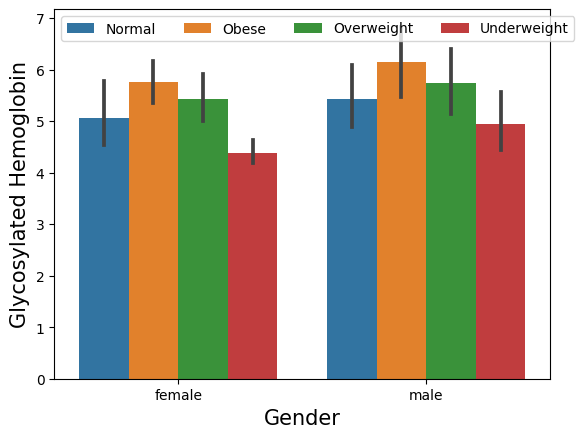

In [14]:
ax2 = sns.barplot(x="gender",y="glyhb",hue="bmi_status",data=df)
ax2.legend(loc='upper left', ncol=4)
ax2.set_xlabel("Gender",fontsize=15)
ax2.set_ylabel("Glycosylated Hemoglobin",fontsize=15)

##**Observation**##
Here in both the genders it is seen that as the **body mass index** gets higher,  the **cholestrol level** is also high

#**BARPLOT**
**Gender vs Age** by grouping according to **status of diabetes**

Text(0, 0.5, 'Age')

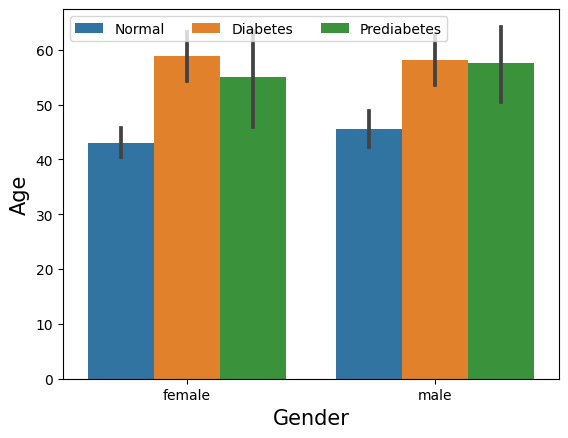

In [15]:
ax3 = sns.barplot(x="gender",y="age",hue="status",data=df)
ax3.legend(loc='upper left', ncol=4)
ax3.set_xlabel("Gender",fontsize=15)
ax3.set_ylabel("Age",fontsize=15)

#**SCATTERPLOT**
**Age vs GLycosylated Hemoglobin**

<Axes: xlabel='age', ylabel='glyhb'>

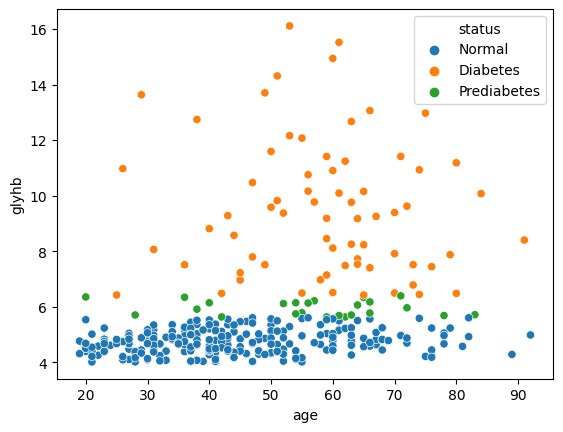

In [16]:
sns.scatterplot(x="age",y="glyhb",data=df,hue = 'status')

##**Observation**
From the ***scatterplot*** and ***barplot*** it is seen that with an **increase in age** , there is a high chance of getting **diabetes**.


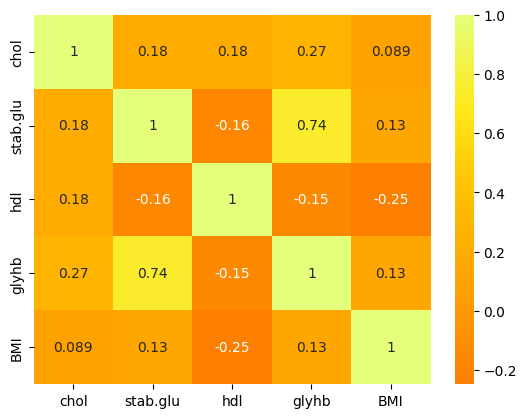

In [17]:
temp = df.loc[:, ['chol', 'stab.glu','hdl','glyhb','BMI']]
dataplot = sns.heatmap(temp.corr(), cmap='Wistia_r', annot=True)
plt.show()

From the heatmap it is seen that cholestrol is highly correlated to glycosylated hemoglobin and so it can be used as a indication to whether a person has diabetes or not

Also it is seen that all the parameters are positively correlated except high density lipoprotein(good cholestrol).

In [18]:
def hdl_status(value):
    if value >= 50 and value <=100 :
        return "Normal"
    else:
        return "Unhealthy"

df['hdl_status'] = df['hdl'].map(hdl_status)

**PROBABILITY OF HAVING DIABETES IF THE PERSON HAS LOW HDL**

In [31]:
# COUNT OF PEOPLE HAVING LOW HDL AND DIABETES TOGETHER
hdl_diabetes = len(df[(df['hdl_status']=='Unhealthy') & (df['status']=='Diabetes')])

# COUNT OF PEOPLE HAVING LOW HDL
unhealthy_hdlcounts = df['hdl_status'].value_counts()['Unhealthy']

# PROBABILITY OF HAVING DIABETES IF THE PERSON HAS LOW HDL
print('Probability of a person whose hdl is low has diabetes', round(hdl_diabetes/unhealthy_hdlcounts,2))

Probability of a person whose hdl is low has diabetes 0.22


**PROBABILITY OF HAVING DIABETES IF THE PERSON HAS HIGH CHOLESTEROL**

In [32]:
# COUNT OF PEOPLE HAVING HIGH CHOLESTEROL AND DIABETES TOGETHER
chol_diabetes = len(df[(df['chol_status']=='High') & (df['status']=='Diabetes')])

# COUNT OF PEOPLE HAVING HIGH CHOLESTEROL
high_cholcounts = df['chol_status'].value_counts()['High']

# PROBABILITY OF HAVING DIABETES IF THE PERSON HAS HIGH CHOLESTEROL
print('Probability of a person whose cholestrol is high has diabetes', round(chol_diabetes/high_cholcounts,2))

Probability of a person whose cholestrol is high has diabetes 0.31


Normal blood pressure for most adults is defined as a  **systolic pressure of less than 120 and a diastolic pressure of less than 80**. Elevated blood pressure is defined as a systolic pressure between 120 and 129 with a diastolic pressure of less than 80

In [37]:
# CONVERTING FLOATS TO INT

df['bp.1s'] = df['bp.1s'].astype(int)
df['bp.1d'] = df['bp.1d'].astype(int)


**PROBABILITY THAT A PERSON WITH UNUSUAL BLOOD PRRESSURE HAS DIABETES**

In [42]:
# COUNT OF PEOPLE HAVING UNSUAL BP AND DIABETES TOGETHER
bp_diabetes = len(df[(df['bp.1s'] >= 120) & (df['bp.1d'] >= 80) & (df['status']=='Diabetes')])

# COUNT OF PEOPLE HAVING UNUSUAL BP
unusual_bpcounts =len(df[(df['bp.1s'] >= 120) & (df['bp.1d'] >= 80)])

# PROBABILITY THAT A PERSON WITH UNUSUAL BLOOD PRRESSURE HAS DIABETES
print('Probability of a person whose bp is unusual has diabetes', round(bp_diabetes/unusual_bpcounts,2))


Probability of a person whose bp is unusual has diabetes 0.22


**PROBABILITY THAT A OBESE PERSON  HAS DIABETES**

In [41]:
# COUNT OF PEOPLE THAT ARE OBESE AND HAS DIABETES
obese_diabetes = len(df[(df['bmi_status']=='Obese') & (df['status']=='Diabetes')])

# COUNT OF PEOPLE THAT ARE OBESE
obese_count = df['bmi_status'].value_counts()['Obese']

# PROBABILITY THAT A OBESE PERSON  HAS DIABETES
print('Probability that a obese perosn has diabetes', round(obese_diabetes/obese_count,2))

Probability that a obese perosn has diabetes 0.22


**Probability that a obese person having high cholesterol has diabetes**

In [45]:

t = len(df[(df['status']=='Diabetes') & (df['bmi_status']=='Obese') & (df['chol_status']=='High')])


s =len(df[ (df['bmi_status']=='Obese') & (df['chol_status']=='High')])

print('Probability of a person whose bp is unusual has diabetes', round(t/s,2))

Probability of a person whose bp is unusual has diabetes 0.29


**PROBABILITY THAT A NORMAL PERSON  HAS DIABETES**

In [46]:
# COUNT OF PEOPLE THAT ARE NORMAL AND HAS DIABETES
normalbmi_diabetes = len(df[(df['bmi_status']=='Normal') & (df['status']=='Diabetes')])

# COUNT OF PEOPLE THAT ARE OBESE
normalbmi_count = df['bmi_status'].value_counts()['Normal']

# PROBABILITY THAT A NORAML PERSON  HAS DIABETES
print('Probability that a nromal perosn has diabetes', round(normalbmi_diabetes/normalbmi_count,2))

Probability that a nromal perosn has diabetes 0.1


**PROBABILITY OF HAVING DIABETES IF THE PERSON HAS NORMAL CHOLESTEROL**

In [47]:
normal_chol_diabetes = len(df[(df['chol_status']=='Normal') & (df['status']=='Diabetes')])
normal_cholcounts = df['chol_status'].value_counts()['Normal']


print('Probability of a person whose cholestrol is normal has diabetes', round(normal_chol_diabetes/normal_cholcounts,2))

Probability of a person whose cholestrol is normal has diabetes 0.12
